# Introduction to Graphs and basic properties

You can use NetworkX to construct and draw graphs. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.

Note that many exercises are followed by a block with some `assert` statements. These assertions may be preceded by some setup code. They are provided to give you feedback that you are on the right path -- receiving an `AssertionError` probably means you've done something wrong.

## Official documentation

https://networkx.org/documentation/stable/reference/index.html

## Official tutorials section

https://networkx.org/documentation/stable/tutorial.html

# Part 1

Contents:

1. Creating and drawing graphs
1. Representing graphs
1. Degree, neighbors, predecessors, successors 
1. Average degree 
1. Density and sparsity
1. Clustering coefficient

# The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [1]:
import networkx as nx

%matplotlib inline

Let's check the installed version of NetworkX. Major versions can be incompatible, e.g., v2 with v1, so we want to make sure we're not using an out of date package.

In [2]:
nx.__version__

'3.4.2'

# Creating and drawing undirected graphs

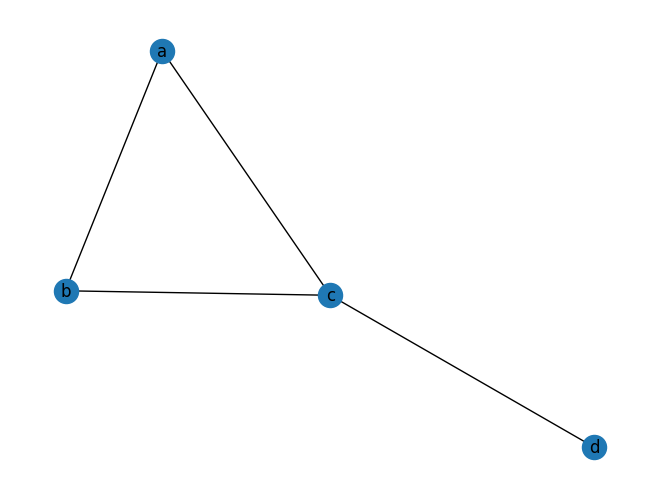

In [3]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

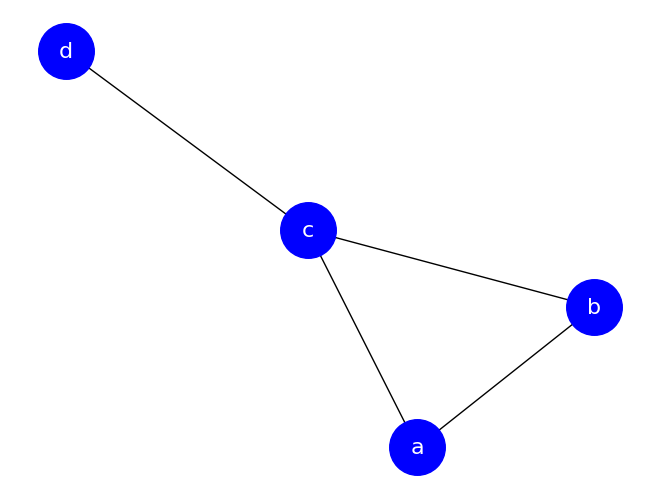

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

# A note on naming conventions

Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.

# Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [5]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [6]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [7]:
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [9]:
G.number_of_nodes()

4

In [10]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [11]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [12]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the `list` constructor to make a list from an iterator:

In [13]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [14]:
nx.is_tree(G)

False

In [15]:
nx.is_connected(G)

True

# Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [16]:
G.has_node('a')

True

In [17]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [18]:
'd' in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [19]:
G.has_edge('a', 'b')

True

In [20]:
G.has_edge('a', 'd')

False

In [21]:
('c', 'd') in G.edges

True

# Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [22]:
len(list(G.neighbors('a')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [23]:
G.degree('a')

2

# Aside: comprehensions

Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [24]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [25]:
print(G.nodes())
print([G.degree(n) for n in G.nodes])

['a', 'b', 'c', 'd']
[2, 2, 3, 1]


Generator expressions are slightly different as they are evaluated [lazily](https://en.wikipedia.org/wiki/Lazy_evaluation). These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [26]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [27]:
max(len(item) for item in items)

6

In [28]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

# Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

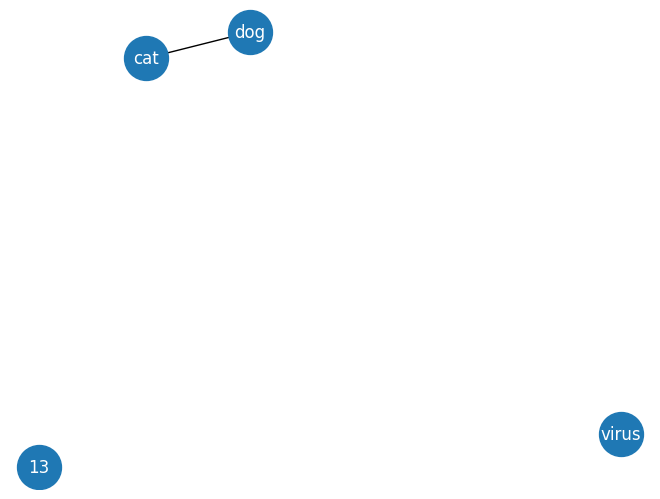

In [29]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

# Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [30]:
print(open('../datasets/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [31]:
SG = nx.read_adjlist('../datasets/friends.adjlist')

We know how to draw this graph:

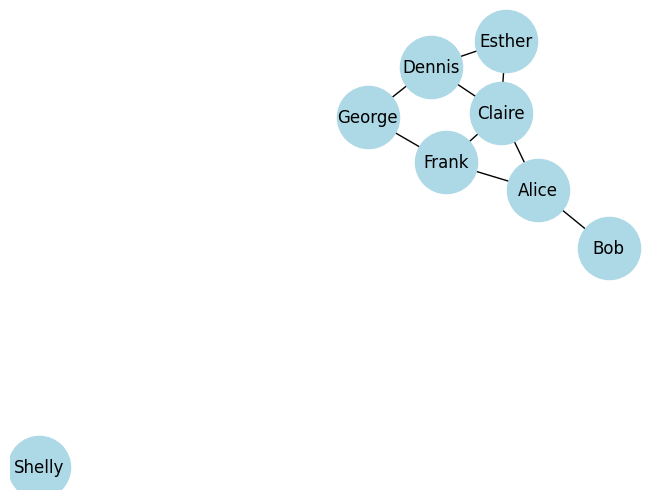

In [32]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [33]:
SG.degree('Alice')

3

# Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

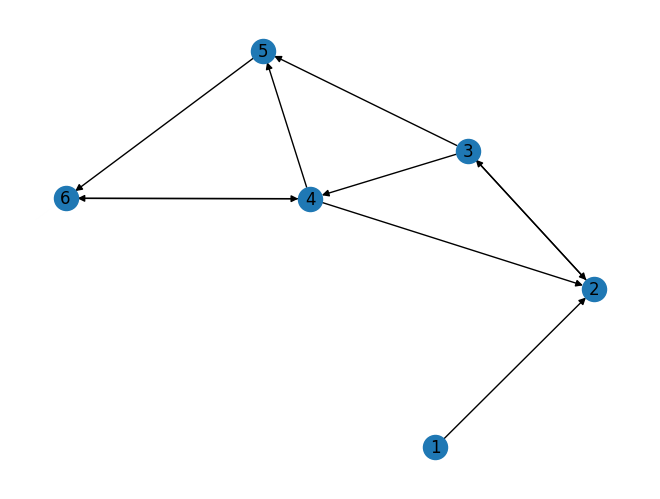

In [34]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [35]:
D.has_edge(1,2)

True

In [36]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [37]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [38]:
D.in_degree(2)

3

In [39]:
D.out_degree(2)

1

### Caveat

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [40]:
D.degree(2)

4

In [41]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


# Density and sparsity

The density of a graph is a measure of how many edges are in the graph compared to the maximum possible number of edges. The sparsity is simply 1 minus the density, indicating how sparse the graph is.

We use the famous Karate Club graph in same of the examples in the rest of the tutorial.

Density of the Karate Club graph: 0.13903743315508021
Sparsity of the Karate Club graph: 0.8609625668449198


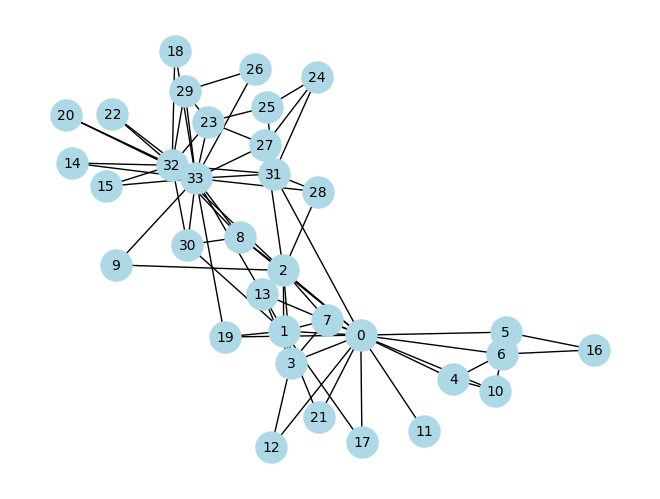

In [42]:
# Load the Karate Club graph
karate_club_graph = nx.karate_club_graph()

# Plot the Karate Club graph
nx.draw(karate_club_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

# Compute the density of the graph
density = nx.density(karate_club_graph)
print(f"Density of the Karate Club graph: {density}")

# Compute the sparsity of the graph
sparsity = 1 - density
print(f"Sparsity of the Karate Club graph: {sparsity}")

# Average Degree of a Graph

The average degree of a graph is a measure of how many edges are connected to a node on average. 

This measure helps to understand the level of connectivity of the graph.

The average degree of a graph can be computed in two ways:

1. **Using the total degree and the number of nodes:**

    $$ \text{Average Degree} = \frac{\sum \text{degree}(v)}{n} $$

    where:
    - $\sum \text{degree}(v)$ is the sum of the degrees of all nodes.
    - $n$ is the number of nodes.

2. **Using the number of edges and the number of nodes (for undirected graphs):**

    $$ \text{Average Degree} = \frac{2 \times \text{number of edges}}{n} $$

    where:
    - $\text{number of edges}$ is the total number of edges in the graph.
    - $n$ is the number of nodes.

In [43]:
# Calculate the average degree of the graph
total_degree = sum(dict(karate_club_graph.degree()).values())
num_nodes = karate_club_graph.number_of_nodes()
avg_degree = total_degree / num_nodes

print(f"Average degree of the Karate Club graph: {avg_degree}")

Average degree of the Karate Club graph: 4.588235294117647


In [44]:
# Calculate the average degree with a simpler method (undirected graph)

num_edges = karate_club_graph.number_of_edges()
num_nodes = karate_club_graph.number_of_nodes()
avg_degree = (2 * num_edges) / num_nodes

print(f"Average degree of the Karate Club graph: {avg_degree}")

Average degree of the Karate Club graph: 4.588235294117647


# Clustering Coefficient

The clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. It is used to determine the presence of tightly knit groups of nodes in a graph.

### Local Clustering Coefficient

The local clustering coefficient of node $v$ is defined as the ratio of the number of triangles (i.e., sets of three nodes that are all connected to each other) that include $v$ to the number of possible triangles that could include $v$. Mathematically, it is given by:

$$ C(v) = \frac{2T(v)}{\text{deg}(v)(\text{deg}(v) - 1)} $$

where:
- $T(v)$ is the number of triangles through node $v$.
- $deg(v)$ is the degree of node $v$.

### Average Clustering Coefficient

The average clustering coefficient of a graph is the mean of the clustering coefficients of all the nodes in the graph. It provides an overall indication of the clustering tendency of the entire graph. It is calculated as:

$$ \bar{C} = \frac{1}{n} \sum_{v \in G} C(v) $$

where:
- $n$ is the number of nodes in the graph.
- $C(v)$ is the clustering coefficient of node $v$.

In the context of the Karate Club graph, we have computed the clustering coefficient for each node and the average clustering coefficient for the entire graph.

In [45]:
# Compute the local clustering coefficient 
clustering_coefficients = nx.clustering(karate_club_graph)
print("Clustering coefficients for each node:")
print(clustering_coefficients)

Clustering coefficients for each node:
{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


In [46]:
# Compute the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(karate_club_graph)
print(f"Average clustering coefficient of the Karate Club graph: {average_clustering_coefficient}")

Average clustering coefficient of the Karate Club graph: 0.5706384782076823


# EXERCISE 1
Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [47]:
def get_leaves(G):
    pass

In [48]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

# assert set(get_leaves(G)) == {'c', 'b'}

# EXERCISE 2

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [49]:
def max_degree(G):
    pass

In [50]:
SG = nx.read_adjlist('../datasets/friends.adjlist')

# assert max_degree(SG) == ('Claire', 4)

# EXERCISE 3

Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [51]:
def mutual_friends(G, node_1, node_2):
    pass

In [52]:
SG = nx.read_adjlist('../datasets/friends.adjlist')

# assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
# assert mutual_friends(SG, 'George', 'Bob') == []
# assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

# Part 2 

Contents:

1. Paths
2. Connected components
3. Directed paths & components
4. Dataset: US air traffic network

# 1. Paths

Let's start with a very simple, undirected network.

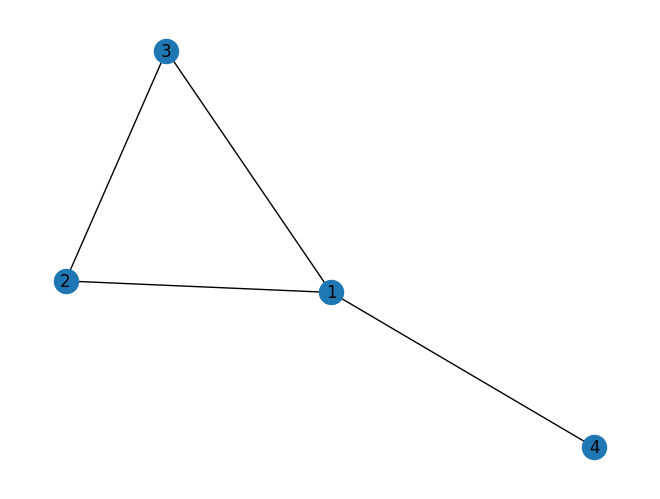

In [53]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

A *path* in a network is a sequence of edges connecting two nodes. In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [54]:
nx.has_path(G, 3, 4)

True

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [55]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

A simple path is one without any cycles. If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in *shortest* paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [56]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

If you only care about the path length, there's a function for that too:

In [57]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of *edges* in the path, not the number of nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes $u$ and $v$.

# Average Path Length

The average path length of a graph is a measure of the average number of steps along the shortest paths for all possible pairs of nodes. It provides an indication of the efficiency of information or resource transfer within the network. A lower average path length suggests that the nodes are more closely connected, which can be beneficial in various contexts such as communication networks, social networks, and transportation systems.

Mathematically, the average path length $L$ is defined as:

$$L = \frac{1}{n(n-1)} \sum_{i \neq j} d(i, j)$$

where:
- $n$ is the number of nodes in the graph.
- $d(i, j)$ is the shortest path distance between nodes $i$ and $j$.

In the context of the Karate Club graph, we have computed the average path length to understand the connectivity and efficiency of the network.

In [58]:
# Calculate the average path length of the Karate Club graph
average_path_length = nx.average_shortest_path_length(karate_club_graph)
print(f"Average path length of the Karate Club graph: {average_path_length}")

Average path length of the Karate Club graph: 2.408199643493761


# Diameter of a Graph

The diameter of a graph is the greatest distance between any pair of nodes. In other words, it is the length of the longest shortest path between any two nodes in the graph. The diameter provides a measure of the "size" of the graph in terms of the maximum distance between nodes.

In [59]:
# Compute the diameter of the Karate Club graph
diameter = nx.diameter(karate_club_graph)
print(f"Diameter of the Karate Club graph: {diameter}")

Diameter of the Karate Club graph: 5


## 2. Connected components

In the simple network above, we can see that for *every* pair of nodes, we can find a path connecting them. This is the definition of a *connected* graph. We can check this property for a given graph:

In [60]:
nx.is_connected(G)

True

Not every graph is connected:

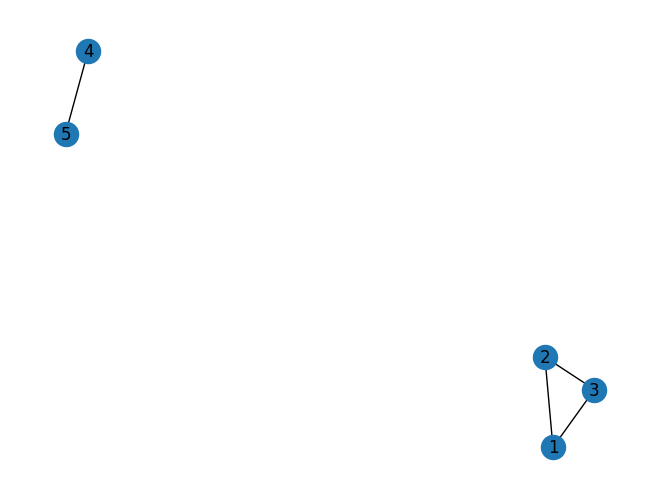

In [61]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [62]:
nx.is_connected(G)

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [63]:
nx.has_path(G, 3, 5)

False

In [64]:
try:
    nx.shortest_path(G, 3, 5)
except Exception as ex:
    print(ex)



No path between 3 and 5.


Visually, we can identify two connected components in our graph. Let's verify this:

In [65]:
nx.number_connected_components(G)

2

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [66]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In case you're not familiar with Python sets, they are collections of items without duplicates. These are useful for collecting node names because node names should be unique. As with other collections, we can get the number of items in a set with the `len` function:

In [67]:
components = list(nx.connected_components(G))
len(components[0])

3

We often care about the largest connected component, which is sometimes referred to as the *core* of the network. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:

In [68]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the `G.subgraph()` function:

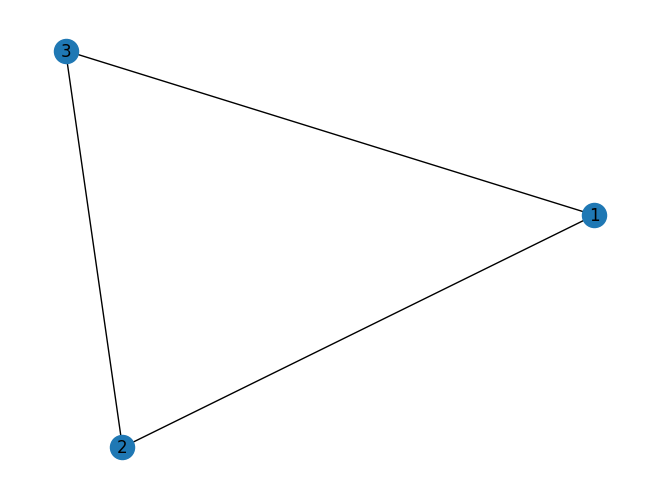

In [69]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

Those of you using tab-completion will also notice a `nx.connected_component_subgraphs()` function. This can also be used to get the core subgraph but the method shown is more efficient when you only care about the largest connected component.

# 3. Directed paths & components

Let's extend these ideas about paths and connected components to directed graphs.

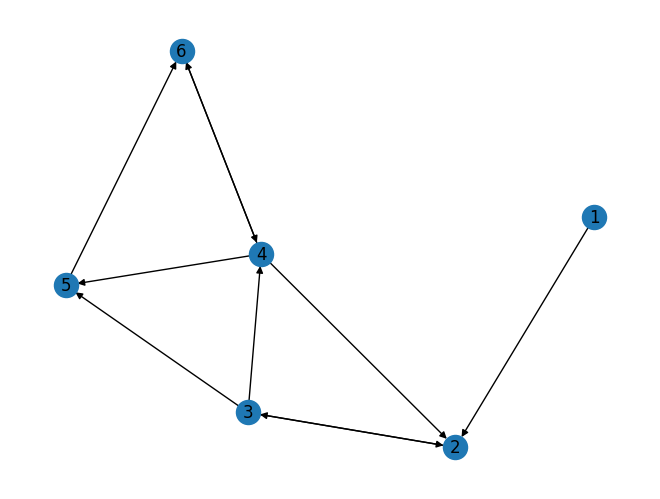

In [70]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

### Paths in directed graphs

We know that in a directed graph, an edge from an arbitrary node $u$ to an arbitrary node $v$ does not imply that an edge exists from $v$ to $u$. Since paths must follow edge direction in directed graphs, the same asymmetry applies for paths. Observe that this graph has a path from 1 to 4, but not in the reverse direction.

In [71]:
nx.has_path(D, 1, 4)

True

In [72]:
nx.has_path(D, 4, 1)

False

The other NetworkX functions dealing with paths take this asymmetry into account as well:

In [73]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [74]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

Since there is no edge from 5 to 3, the shortest path from 5 to 2 cannot simply backtrack the shortest path from 2 to 5 -- it has to go a longer route through nodes 6 and 4.

### Directed components

Directed networks have two kinds of connectivity. **Strongly connected** means that there exists a directed path between every pair of nodes, i.e., that from any node we can get to any other node while following edge directionality. Think of cars on a network of one-way streets: they can't drive against the flow of traffic.

In [75]:
nx.is_strongly_connected(D)

False

**Weakly connected** means that there exist a path between every pair of nodes, regardless of direction. Think about pedestrians on a network of one-way streets: they walk on the sidewalks so they don't care about the direction of traffic.

In [76]:
nx.is_weakly_connected(D)

True

If a network is strongly connected, it is also weakly connected. The converse is not always true, as seen in this example.

The `is_connected` function for undirected graphs will raise an error when given a directed graph.

In [77]:
# This will raise an error
try:
    nx.is_connected(D)
except Exception as ex:
    print(ex)   

not implemented for directed type


In the directed case, instead of `nx.connected_components` we now have `nx.weakly_connected_components` and `nx.strongly_connected_components`:

In [78]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [79]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. Dataset: US air traffic network

This repository contains several example network datasets. Among these is a network of US air travel routes:

In [80]:
G = nx.read_graphml('../datasets/openflights/openflights_usa.graphml.gz')

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [81]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [82]:
G.nodes['IND']['name']

'Indianapolis International Airport'

# EXERCISE 1

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

# EXERCISE 2

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

# EXERCISE 3

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?